In [1]:
# Each node in G is either a road intersection,
# a rail station or a metro station.

# Vertex : metro 356->303(type = metro), train 241, tram 146
# Edge : metro 367, train 246, tram 140

# Using Edge, Vertex List >>> Metro, Train Graph Create

In [2]:
%load_ext autoreload
%autoreload 
# %matplotlib notebook

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import networkx as nx
import pandas as pd
from src.create import *
from src.attack import *
from src.measure import *

In [3]:
e_file = "../../data/edge/edge.csv"
n_file = "../../data/vertex/vertex.csv"

## edge.csv file analysis

In [3]:
df_e = pd.read_csv(e_file)
df_n = pd.read_csv(n_file)

df_edge_m = df_e[df_e["Layer"]=="metro"]
df_edge_r = df_e[df_e["Layer"]=="road"]
df_edge_t = df_e[df_e["Layer"]=="train"]
df_edge_trm = df_e[df_e["Layer"]=="tram"]

df_node_m = df_n[df_n["Layer"]=="metro"]
df_node_r = df_n[df_n["Layer"]=="road"]
df_node_t = df_n[df_n["Layer"]=="train"]
df_node_trm = df_n[df_n["Layer"]=="tram"]

df_edge_crs = df_e[df_e["Layer"]=="crosslayer"]
df_edge_crs = paris_CrsLayerAddColumn(df_edge_crs,df_node_t, df_node_trm, df_node_m, df_node_r)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [4]:
src_m_ind = df_edge_crs["Source Layer"] == "metro"
print( "Src Metro and Trg ...", df_edge_crs[src_m_ind]["Target Layer"].unique())

src_tr_ind = df_edge_crs["Source Layer"] == "train"
print( "Src Train and Trg ...", df_edge_crs[src_tr_ind]["Target Layer"].unique())

src_trm_ind = df_edge_crs["Source Layer"] == "tram"
print( "Src Tram and Trg ...", df_edge_crs[src_trm_ind]["Target Layer"].unique())

src_r_ind = df_edge_crs["Source Layer"] == "road"
print( "Src Road and Trg ...", df_edge_crs[src_r_ind]["Target Layer"].unique())

Src Metro and Trg ... ['road' 'train']
Src Train and Trg ... ['road']
Src Tram and Trg ... []
Src Road and Trg ... []


In [5]:
df_edge_m_r = df_edge_crs[(df_edge_crs["Source Layer"] == "metro") & (df_edge_crs["Target Layer"] == "road")]
df_edge_m_tr = df_edge_crs[(df_edge_crs["Source Layer"] == "metro") & (df_edge_crs["Target Layer"] == "train")]
df_edge_tr_r = df_edge_crs[(df_edge_crs["Source Layer"] == "train") & (df_edge_crs["Target Layer"] == "road")]


In [6]:
print("metro-road edges: ", df_edge_m_r.shape)
print("metro-train edges: ", df_edge_m_tr.shape)
print("train-road edges: ", df_edge_tr_r.shape)

metro-road edges:  (1498, 8)
metro-train edges:  (64, 8)
train-road edges:  (2509, 8)


In [8]:
# df_edge_m.to_csv("../data/edge/edge_m.csv", index=False)
# df_edge_r.to_csv("../data/edge/edge_r.csv", index=False)
# df_edge_t.to_csv("../data/edge/edge_t.csv", index=False)
# df_edge_trm.to_csv("../data/edge/edge_trm.csv", index=False)

# df_edge_m_r.to_csv("../data/edge/edge_m_r.csv", index=False)
# df_edge_m_tr.to_csv("../data/edge/edge_m_tr.csv", index=False)
# df_edge_tr_r.to_csv("../data/edge/edge_tr_r.csv", index=False)

## Create Interdependent Paris Transp Network

In [4]:
G_train, df_n_train, df_e_train = paris_GenTranspNet(n_file,e_file,'train',1)
G_metro, df_n_metro, df_e_metro = paris_GenTranspNet(n_file,e_file,'metro',2)

edges_m_tr = "../../data/edge/edge_m_tr.csv"

intd_m_tr, e_m_tr = paris_GenMultiTranspNet(G_metro, G_train, edges_m_tr)


In [5]:
len(e_m_tr)

64

In [6]:
print("train nodes: %d  train edges: %d" %(len(G_train.nodes()),len(G_train.edges())))
print("metro nodes: %d  metro edges: %d" %(len(G_metro.nodes()),len(G_metro.edges())))
print("train-metro crosslayer edges: %d" %(len(e_m_tr)))
print("")
print("metro-train nodes: %d  metro-train edges: %d" %(len(intd_m_tr.nodes()),len(intd_m_tr.edges())))

train nodes: 241  train edges: 244
metro nodes: 303  metro edges: 356
train-metro crosslayer edges: 64

metro-train nodes: 544  metro-train edges: 664


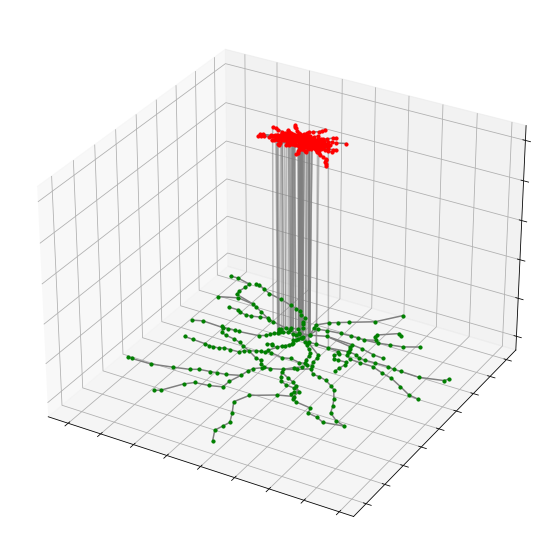

In [7]:
intdNetworkDraw(intd_m_tr)

## Metro-Train Interconnected Nodes Check

In [8]:
conct_m_tr = intd_m_tr.edge_subgraph(e_m_tr).copy()
nodes = conct_m_tr.nodes()
layers = nx.get_node_attributes(conct_m_tr, "layer")
layer1, layer2 = 0, 0
for node in nodes:
    if layers[node] == 1:
        layer1 += 1
    else:
        layer2 += 1
print("Crossedge nodes(Total): %d \n Train nodes(Total): %d \n Metro nodes(Total): %d" %(len(nodes),layer1,layer2))

Crossedge nodes(Total): 84 
 Train nodes(Total): 28 
 Metro nodes(Total): 56


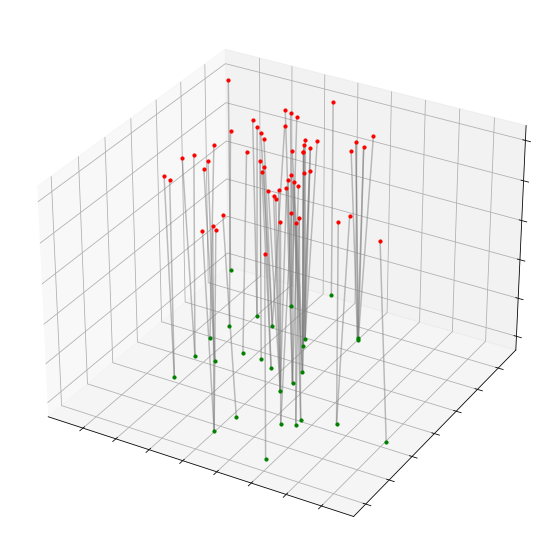

In [9]:
intdNetworkDraw(conct_m_tr)

In [16]:
df_e_GH = pd.read_csv(edges_m_tr)

df_e_GH = df_e_GH[["# Source NodeID","Target NodeID"]]
s_source = df_e_GH.loc[:,"# Source NodeID"]
s_target = df_e_GH.loc[:,"Target NodeID"]

print(df_e_GH.groupby("# Source NodeID").count().sort_values(by=["Target NodeID"],ascending=False)[:3])

print(df_e_GH.groupby("Target NodeID").count().sort_values(by=["# Source NodeID"],ascending=False)[:3])

print(s_source.shape, len(s_source.unique()))
print(s_target.shape, len(s_target.unique()))



                          Target NodeID
# Source NodeID                        
5453b63355474a33623173a1              2
5453b63555474a336231a59a              2
5453b63455474a3362317420              2
                          # Source NodeID
Target NodeID                            
5453b63555474a336231a8c5                5
5453b63555474a336231a5ca                5
5453b63455474a336231768a                4
(64,) 56
(64,) 28


In [49]:
source = "5453b63555474a336231a8c5"
print(source)
train_sp_edge = intd_m_tr.edges(source)

for edge in train_sp_edge:
    target = edge[1]
    if nx.get_node_attributes(intd_m_tr, "3D_pos")[target][2] == 2:
        print("metro target: ",target)

# Train : Gare d'Auber 5453b63555474a336231a8c5, 2.3304290066, 48.8718083114)
# Metro : Chaussée d'Antin–La Fayette 5453b63555474a336231a3a0, 2.3333207, 48.8730612
# Metro : Madeleine 5453b63455474a336231742f,2.3251637,48.8700644
# Metro : Opéra 5453b63455474a3362317bcc,2.3322642999999954,48.87076929999996
# Metro : Havre - Caumartin 5453b63455474a336231911e,2.3276269,48.8736019
# Metro : Opéra 5453b63455474a336231911d,2.3322643,48.8707693

5453b63555474a336231a8c5
metro target:  5453b63555474a336231a3a0
metro target:  5453b63455474a336231742f
metro target:  5453b63455474a3362317bcc
metro target:  5453b63455474a336231911e
metro target:  5453b63455474a336231911d


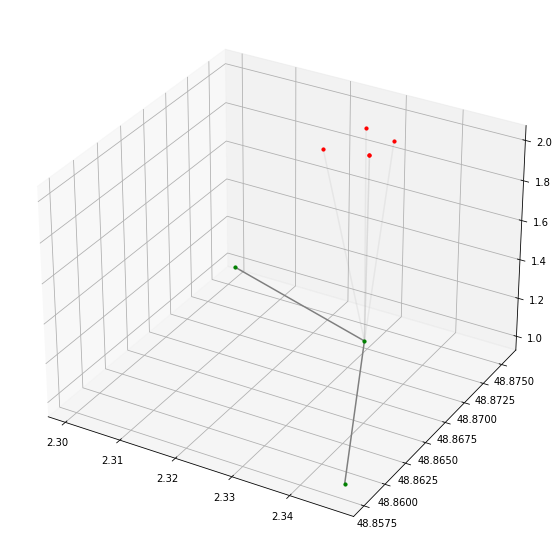

In [46]:
conct_m_tr = intd_m_tr.edge_subgraph(train_sp_edge).copy()
intdNetworkDraw(conct_m_tr,10)

## Import Graphml

In [71]:
graphml = "../data/graphml/multigraph.graphml"
intd_paris = nx.read_graphml(graphml)

# Appendix